# Ovarian cancer data

This consists of gene data for 216 patients, 121 of whom have ovarian cancer, and 95 of whom do not. For each patient, there is a vector of data containing the expression of 4000 genes.

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 16})

Download data files if they are not present.

In [2]:
if(os.path.isfile('../DATA/ovariancancer_obs.csv') == False or
   os.path.isfile('../DATA/ovariancancer_grp.csv') == False):
    !mkdir -p ../DATA
    !wget -P ../DATA -c https://bitbucket.org/cpraveen/nla/downloads/ovariancancer_obs.csv
    !wget -P ../DATA -c https://bitbucket.org/cpraveen/nla/downloads/ovariancancer_grp.csv

Open the data files.

In [3]:
obs = np.loadtxt('../DATA/ovariancancer_obs.csv',delimiter=',')
f = open('../DATA/ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
print('Shape of obs = ', obs.shape)
print('Length of grp= ', len(grp))

Shape of obs =  (216, 4000)
Length of grp=  217


The data in the matrix `obs` is arranged like this

$$
A = 
\begin{bmatrix}
-- & p_1^\top & -- \\
   &  \vdots &  \\
-- & p_{216}^\top & -- \\
\end{bmatrix}
$$

i.e., each row $p_j \in R^{4000}$ corresponds to the gene expression of one patient.

Compute the reduced SVD

$$
A = U \hat \Sigma \hat V^\top = 
\begin{bmatrix}
| &  &  | \\
u_1 & \cdots & u_{216} \\
| &  &  | 
\end{bmatrix}
\textrm{diag}[\sigma_1, \ldots, \sigma_{216}]
\begin{bmatrix}
| &  &  | \\
v_1 & \cdots & v_{216} \\
| &  &  | 
\end{bmatrix}^\top
$$

where

$$
u_j \in R^{216}, \qquad v_j \in R^{4000}
$$

In [4]:
U, S, VT = np.linalg.svd(obs,full_matrices=0)
print('Shape of U = ',U.shape)
print('Shape of VT = ',VT.shape)

Shape of U =  (216, 216)
Shape of VT =  (216, 4000)


Plot the singular values

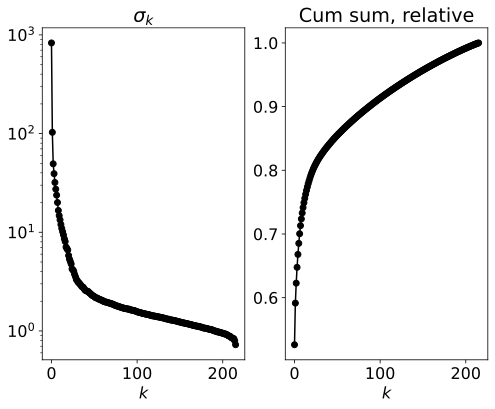

In [5]:
fig1 = plt.figure(figsize=(8,6))

ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.set_xlabel('$k$')
ax1.set_title('$\\sigma_k$')

ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.set_xlabel('$k$')
ax2.set_title('Cum sum, relative')

plt.show()

Let us write the $j$'th patient data in the basis of singular vectors

$$
p_j = x_j v_1 + y_j v_2 + z_j v_3 + \ldots
$$

The coefficients $x_j, y_j, z_j, \ldots $ are called the principal components.

Compute first three principal components: these are

$$
x_j = v_1^\top p_j, \qquad y_j = v_2^\top p_j, \qquad z_j = v_3^\top p_j
$$
and plot them in 3-d space. 

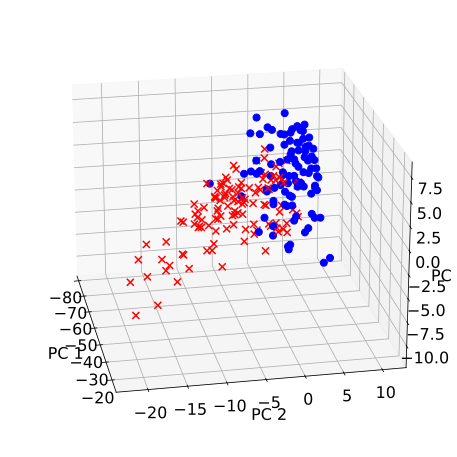

In [6]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]): # Loop over patients
    x = np.dot(VT[0,:], obs[j,:]) # First  PCA
    y = np.dot(VT[1,:], obs[j,:]) # Second PCA
    z = np.dot(VT[2,:], obs[j,:]) # Third  PCA
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.view_init(22,-11)
plt.show()

The points corresponding to cancer (red cross) and non-cancer (blue dot) appear well separated. We can use this to classify the data for a new patient by identifying to which of the two groups it belongs.

If you have `ipympl` installed, you can add the following magic keyword at the top of this notebook. 

```
%matplotlib widget
```

Then you can use your mouse to rotate the above plot.